In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv('heart.csv')

In [4]:
df.shape

(303, 14)

In [10]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [7]:
df.nunique()

age          41
sex           2
cp            4
trtbps       49
chol        152
fbs           2
restecg       3
thalachh     91
exng          2
oldpeak      40
slp           3
caa           5
thall         4
output        2
dtype: int64

In [11]:
df['caa'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

In [12]:
df.caa.value_counts()

caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64

In [13]:
df[df['caa']==4]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [14]:
df.loc[df['caa']==4,'caa']=np.NaN

In [15]:
df['caa'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [17]:
df.thall.value_counts()

thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64

In [18]:
df.loc[df['thall']==0,'thall']=np.NaN

In [19]:
df[df['thall']==0]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output


In [20]:
df['thall'].unique()

array([ 1.,  2.,  3., nan])

In [21]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         5
thall       2
output      0
dtype: int64

In [23]:
df = df.fillna(df.mean())
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [26]:
duplicated=df.duplicated().sum()
if duplicated:
   print("Duplicated rows :{}".format(duplicated))
else:
   print("No duplicates")

Duplicated rows :1


In [27]:
duplicates=df[df.duplicated(keep=False)]
duplicates.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [28]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [32]:
df['target'] = df.output.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina",1: "atypical_angina",2:"non-anginal pain",3: "asymtomatic"})
df['exang'] = df.exng.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slp.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thall.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})

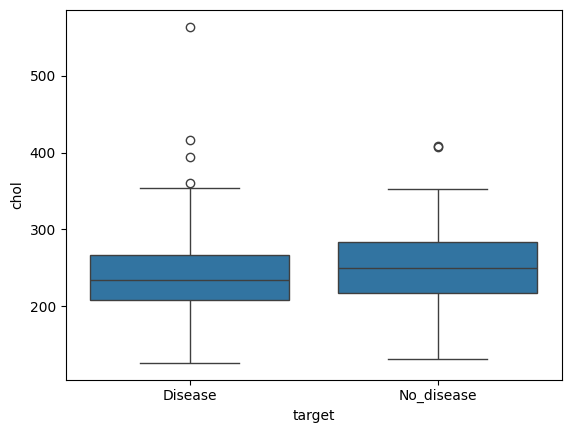

In [33]:
import matplotlib.pyplot as plt
import seaborn as sb
bxplt = sb.boxplot(data=df, x="target", y="chol")
plt.show()

<Axes: xlabel='target', ylabel='oldpeak'>

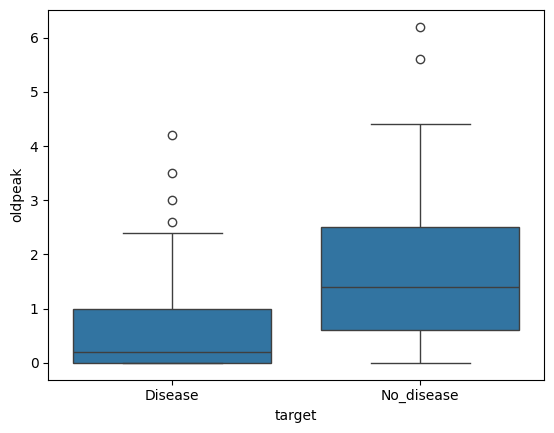

In [34]:
sb.boxplot(x='target', y='oldpeak', data=df)

In [37]:
continous_features = ['age','trtbps','chol','thalachh','oldpeak']
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) # 25th percentile of the data of␣the given feature
        Q3 = np.percentile(feature_data, 75.) # 75th percentile of the data of␣the given feature
        IQR = Q3-Q1 #Interquartile Range
        outlier_step = IQR * 1.5 #That's we were talking about above
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()
        if not drop:
           print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
           df.drop(outliers, inplace = True, errors = 'ignore')
           print('Outliers from {} feature removed'.format(each_feature))
outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trtbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalachh, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [38]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trtbps feature removed
Outliers from chol feature removed
Outliers from thalachh feature removed
Outliers from oldpeak feature removed


In [39]:
from sklearn import preprocessing
df=df.apply(preprocessing.LabelEncoder().fit_transform)